In [186]:
import numpy as np
import matplotlib.pyplot as plt


def periodic(x,amplitute=[1,1],freq=[1,1],shift=[0,0]):
    
    n = len(x)
    
    y = np.zeros(n)
    for j,p in enumerate(amplitute): 
        for i,dt in enumerate(x): 
            y[i] += p*np.sin(freq[j]*dt+shift[j])
    
    return y

def harmonic_bases(x,freq=[1]):
    ''' create a harmonic bases [1, sin(w_i*x), cos(w_i*x)]
    given a frequency list
    
    arguments :
        freq : list
        
    return 
        phi : np.array
            bases of a Fourier Expansion 
            the size of the bases is 1 + 2*n_harm
            where n_harm is the size of freq list
    
    '''
    pi = np.pi
    n_harm = len(freq)
    n = len(x)
    phi = np.zeros([n,2*n_harm+1])
    phi[:,0] = 1.0
    for j,omega in enumerate(freq): 
        for i,dt in enumerate(x): 
            phi[i,j+1] += np.sin(pi*freq[j]*dt)
    
    print(j)
    for k,omega in enumerate(freq): 
        for i,dt in enumerate(x): 
            phi[i,k+j+2] += np.cos(pi*freq[k]*dt)
    
    return phi

def FourierTrans(y,x,freq=[1]):
    ''' Apply Fourier Transform
    in y(x) given a frequency list
    
    y = a0 + sum(ai*sin(wi)) + sum(bi*cos(wi))
    
    arguments 
        x : np.array
            argument of y
        y : np.array
            function on x
        freq : list 
    
    returns 
        a0, a1, b1
        Fourier coef
    '''
    phi = harmonic_bases(x,freq=freq) 
    n, n_bases = phi.shape
    print(n_bases)
    a = np.linalg.solve(phi.T.dot(phi), y.dot(phi)) 
    a0 = a[0]
    n_sin = int((n_bases-1)/2)
    a1 = a[1:n_sin+1]
    b1 = a[n_sin+1:]
    
    return a0,a1,b1
    

def transforme2ampliture_and_shift(a,b): 
    A = np.sqrt(a**2 - b**2)
    shift = np.arctan(-b/a)
    return A,shift

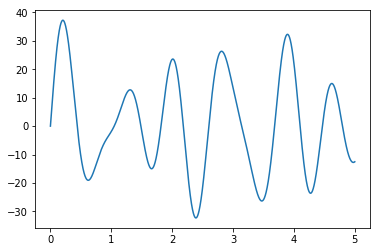

In [222]:
# create data
interval=[0,5]
dt=0.001
x = np.arange(interval[0],interval[1],dt)
y = periodic(x,amplitute=[10,20,10],freq=[5,7,10],shift=[0,0,0])
plt.plot(x,y,'-')

In [226]:
freq = np.arange(1,30,0.1)    
phi = harmonic_bases(x,freq=freq) 

289


In [227]:
a0, a1, b1 = FourierTrans(y,x,freq)
a = np.concatenate(([a0],a1,b1))
b1.shape


289
581


(290,)

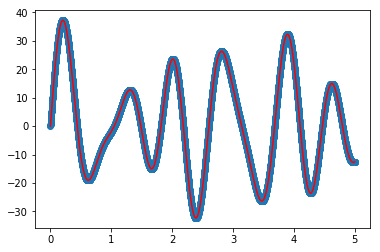

In [228]:
y_calc = phi.dot(a)
plt.plot(x,y,'o')
plt.plot(x,y_calc,'r-')

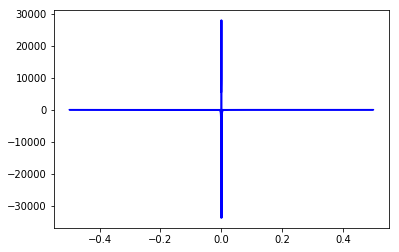

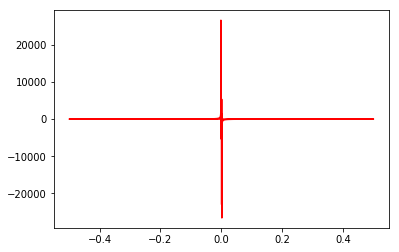

In [229]:
sp = np.fft.fft(y)
sfreq = np.fft.fftfreq(x.shape[-1])
plt.plot(sfreq, sp.real,'b-') 

plt.figure()
plt.plot(sfreq, sp.imag,'r-')

In [230]:
amplitude, shift = transforme2ampliture_and_shift(a1,b1)

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in sqrt


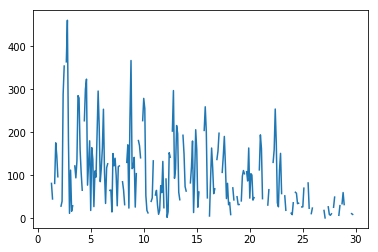

In [231]:
plt.plot(freq,amplitude)

In [232]:
shift

array([ 6.35518487e-01,  1.26011979e+00,  1.50293667e+00,  3.48686800e-01,
        6.98748734e-01, -1.45178865e+00, -3.00160134e-01,  2.35547526e-01,
        5.07922429e-01,  5.88224538e-01, -9.38164141e-01, -1.32559668e+00,
       -4.55646173e-01,  6.75565279e-01,  1.36358129e-03,  2.49902744e-01,
       -1.54448714e+00, -7.60387276e-02,  9.04523478e-02,  3.55027688e-01,
       -7.65765329e-01, -2.28965455e-01,  1.02014419e-01,  3.87658620e-01,
       -1.10237626e+00, -4.79776199e-01, -3.72047523e-01, -4.55464861e-01,
       -1.36383061e-01,  2.91228052e-01,  3.78657188e-01,  2.63422470e-01,
        2.93630900e-01, -1.18732077e+00, -1.19622131e-01, -8.91961065e-02,
       -5.48448652e-02,  1.93523396e-01, -2.14243151e-01, -2.14295948e-01,
        6.24933381e-01,  1.43667301e-01, -7.00439115e-02,  5.68142110e-01,
       -6.16379384e-03,  1.83031768e-01, -3.34689614e-01,  1.51094466e-01,
       -2.47608740e-01,  1.49966246e-01, -8.86224136e-02, -4.45456306e-01,
       -6.75110161e-02,  

In [218]:
freq

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [219]:
amplitude

array([       nan,        nan,        nan, 3.13536962,        nan,
       1.34683601,        nan, 0.47300594,        nan, 0.24504575,
              nan,        nan,        nan,        nan,        nan,
       4.88182065,        nan, 0.40121383, 0.00768153, 0.27554507,
       0.02579549, 0.22197941, 0.03302302, 0.18978674, 0.03603676,
       0.16742669, 0.03646142, 0.15061318, 0.02896241])

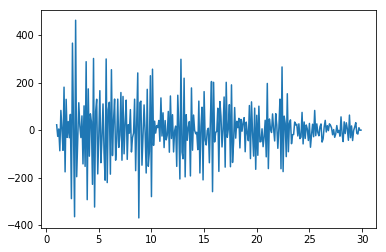

In [233]:
plt.plot(freq,a1)

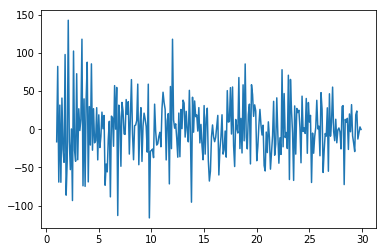

In [234]:
plt.plot(freq,b1)